In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants
LEFT, RIGHT = 0, 1
START, END = 0, 1
RUNS = 10
EPISODES = 100000

In [3]:
# target policy
def pi_prob(action):
    return 1.0 if action == LEFT else 0.0

In [4]:
# behavior policy
def b_prob(action):
    return 0.5

In [29]:
# environment implementation
class Environment:
    def __init__(self):
        self.reset()

    def reset(self):
        self.state = START
        return self.state

    def step(self, action):
        if action == RIGHT:
            reward = 0.0
            self.state = END
        else:
            if np.random.rand() < 0.9:
                reward = 0.0
                self.state = START
            else:
                reward = 1.0
                self.state = END
        return reward, self.state

In [28]:
# agent implementation
class Agent:
    def __init__(self):
        self.t = 0

    def act(self):
        action = LEFT if np.random.rand() < 0.5 else RIGHT
        # action = np.random.binomial(1, 0.5)
        self.t += 1
        return action
    
    def get_rho(self, action):
        # rho only depends on terminal action, since pi(RIGHT|START) = 0
        rho = (pi_prob(action) / b_prob(action))**self.t
        self.t = 0
        return rho

In [32]:
# generate results
env = Environment()
ois = []
wis = []

for run in range(RUNS):
    agent = Agent()
    rewards = []
    rhos = []

    for episode in range(EPISODES):
        state = env.reset()
        while state == START:
            action = agent.act()
            reward, state = env.step(action)
        rho = agent.get_rho(action)
        rewards.append(reward)
        rhos.append(rho)

    rewards = np.asarray(rewards)
    rhos = np.asarray(rhos)
    weighted_rewards = rewards * rhos
    acc_weighted_rewards = np.add.accumulate(weighted_rewards)
    acc_rhos = np.add.accumulate(rhos)

    ois.append(np.asarray(acc_weighted_rewards) / np.arange(1, EPISODES + 1))
    with np.errstate(divide='ignore',invalid='ignore'):
        wis.append(np.where(acc_rhos != 0, acc_weighted_rewards / acc_rhos, 0))


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/x_/dfv90_3n7hg5f9vmpct87lf00000gn/T/ipykernel_82134/1688589339.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel(f'estimate of $v_\pi$')


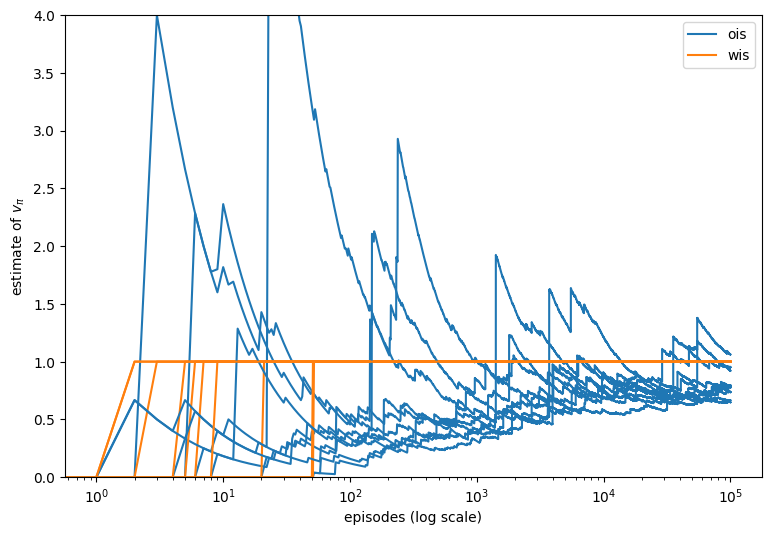

In [33]:
# generate figure
fig, ax = plt.subplots(figsize=(9, 6))

for i in range(RUNS):
    plt.plot(ois[i], label='ois', color='C0')
    plt.plot(wis[i], label='wis', color='C1')

plt.xlabel('episodes (log scale)')
plt.ylabel(f'estimate of $v_\pi$')
plt.xscale('log')
plt.ylim(0, 4.0)
plt.legend(['ois', 'wis'])

plt.show()